In [77]:
import timeit

In [78]:
start = timeit.default_timer()

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, X_train, y_train, X_test, y_test):
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, pred))
    
    fpr, tpr, thresholds = roc_curve(y_test, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [81]:
df_cust_airlines = pd.read_csv('Invistico_Airline.csv', sep=',')
df_cust_airlines.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


# Data Preprocessing

In [82]:
df_cust_airlines_copy_1 = df_cust_airlines.copy() #ini onehot encoding
df_cust_airlines_encode = df_cust_airlines.copy() #ini encoding biasa

In [83]:
from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier: {len(df_cust_airlines_encode)}')

filtered_entries = np.array([True] * len(df_cust_airlines_encode))
for col in ['Flight Distance']:
    zscore = abs(stats.zscore(df_cust_airlines_encode[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
df_cust_airlines_encode = df_cust_airlines_encode[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_cust_airlines_encode)}')

Jumlah baris sebelum memfilter outlier: 129880
Jumlah baris setelah memfilter outlier: 129050


In [84]:
df_cust_airlines_encode['Departure Delay in Minutes'] = df_cust_airlines_encode['Departure Delay in Minutes'].apply(lambda x: 1 if x > 0  else 0) # 1 sama dengan telat
df_cust_airlines_encode['Arrival Delay in Minutes'] = df_cust_airlines_encode['Arrival Delay in Minutes'].apply(lambda x: 1 if x > 0  else 0) # 1 sama dengan telat

In [85]:
data_encod_satisfaction=pd.get_dummies(df_cust_airlines_encode['satisfaction'], prefix='Yes')
data_encod_gender=pd.get_dummies(df_cust_airlines_encode['Gender'], prefix='Gender')
data_encod_cust_type=pd.get_dummies(df_cust_airlines_encode['Customer Type'], prefix='Type')
data_encod_travel_type=pd.get_dummies(df_cust_airlines_encode['Type of Travel'], prefix='Yes')
data_encod_class=pd.get_dummies(df_cust_airlines_encode['Class'],prefix = 'Class')

In [86]:
onehot_data = pd.concat([df_cust_airlines_encode, data_encod_satisfaction, data_encod_gender, data_encod_cust_type, data_encod_travel_type, data_encod_class], axis = 1)

In [87]:
df_cust_airlines_encode['Arrival Delay in Minutes'] = df_cust_airlines_encode['Arrival Delay in Minutes'].fillna(df_cust_airlines_encode['Arrival Delay in Minutes'].median())  

In [88]:
df_cust_airlines_copy_1['Arrival Delay in Minutes'] = df_cust_airlines_copy_1['Arrival Delay in Minutes'].fillna(df_cust_airlines_copy_1['Arrival Delay in Minutes'].median())  

In [89]:
from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier: {len(df_cust_airlines_copy_1)}')

filtered_entries = np.array([True] * len(df_cust_airlines_copy_1))
for col in ['Flight Distance']:
    zscore = abs(stats.zscore(df_cust_airlines_copy_1[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
df_cust_airlines_copy_1 = df_cust_airlines_copy_1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_cust_airlines_copy_1)}')

Jumlah baris sebelum memfilter outlier: 129880
Jumlah baris setelah memfilter outlier: 129050


In [90]:
df_cust_airlines_copy_1['Departure Delay in Minutes'] = df_cust_airlines_copy_1['Departure Delay in Minutes'].apply(lambda x: 1 if x > 0  else 0) # 1 sama dengan telat
df_cust_airlines_copy_1['Arrival Delay in Minutes'] = df_cust_airlines_copy_1['Arrival Delay in Minutes'].apply(lambda x: 1 if x > 0  else 0) # 1 sama dengan telat

# One-Hot Encoding

In [91]:
data_encod_satisfaction=pd.get_dummies(df_cust_airlines_copy_1['satisfaction'], prefix='Yes')
data_encod_gender=pd.get_dummies(df_cust_airlines_copy_1['Gender'], prefix='Gender')
data_encod_cust_type=pd.get_dummies(df_cust_airlines_copy_1['Customer Type'], prefix='Type')
data_encod_travel_type=pd.get_dummies(df_cust_airlines_copy_1['Type of Travel'], prefix='Yes')
data_encod_class=pd.get_dummies(df_cust_airlines_copy_1['Class'],prefix = 'Class')

In [92]:
onehot_data = pd.concat([df_cust_airlines_copy_1, data_encod_satisfaction, data_encod_gender, data_encod_cust_type, data_encod_travel_type, data_encod_class], axis = 1)

In [93]:
df_cust_airlines_encode = onehot_data.copy()
df_cust_airlines_encode['satisfaction_encode'] = df_cust_airlines_encode['satisfaction'].apply(lambda x: 1 if x == 'satisfied'  else 0) # 1 sama dengan satisfied
df_cust_airlines_encode['gender_encode'] = df_cust_airlines_encode['Gender'].apply(lambda x: 1 if x == 'Male'  else 0) # 1 sama dengan laki-laki
df_cust_airlines_encode.reset_index(drop=True).head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Gender_Male,Type_Loyal Customer,Type_disloyal Customer,Yes_Business travel,Yes_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_encode,gender_encode
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,0,1,0,0,1,0,1,0,1,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,1,1,0,0,1,1,0,0,1,1
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,0,1,0,0,1,0,1,0,1,0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,0,1,0,0,1,0,1,0,1,0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,0,1,0,0,1,0,1,0,1,0


# Modelling

In [94]:
rf_model=onehot_data.copy()
rf_model['satisfaction_encode'] = rf_model['satisfaction'].apply(lambda x: 1 if x == 'satisfied'  else 0) # 1 sama dengan satisfied
rf_model['gender_encode'] = rf_model['Gender'].apply(lambda x: 1 if x == 'Male'  else 0) # 1 sama dengan laki-laki
rf_model.reset_index(drop=True).head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Gender_Male,Type_Loyal Customer,Type_disloyal Customer,Yes_Business travel,Yes_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_encode,gender_encode
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,0,1,0,0,1,0,1,0,1,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,1,1,0,0,1,1,0,0,1,1
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,0,1,0,0,1,0,1,0,1,0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,0,1,0,0,1,0,1,0,1,0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,0,1,0,0,1,0,1,0,1,0


# Split Feature dan Label

In [95]:
X = rf_model.drop(columns=['satisfaction','satisfaction_encode','Yes_satisfied',
                           'Yes_dissatisfied','Customer Type','Type of Travel',
                           'Class','Gender','Gender_Female','Gender_Male',
                           'Type_Loyal Customer','Type_disloyal Customer',
                           'Yes_Business travel','Yes_Personal Travel'])
y = rf_model['satisfaction_encode'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [96]:
X_test.shape

(38715, 22)

# RandomForestClassification

In [97]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
eval_classification(rf, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.96
Recall (Test Set): 0.93
F1-Score (Test Set): 0.94
AUC: 0.94


# RandomForestClassification Feature Importance

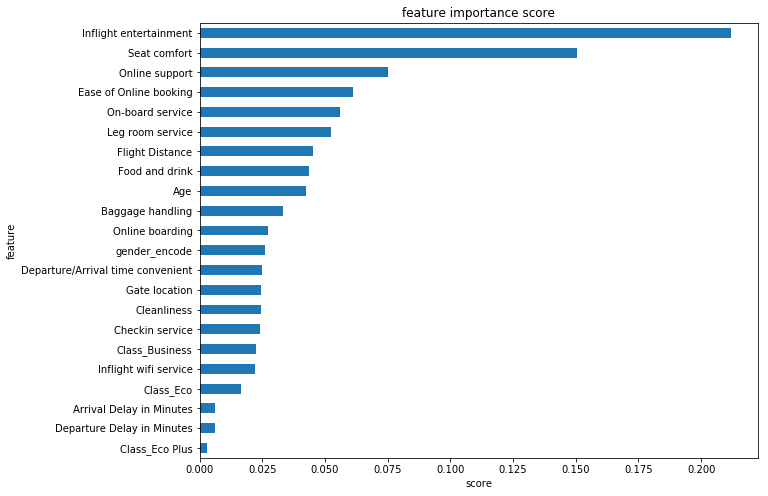

In [98]:
show_feature_importance(rf)

> Top 3 Feature yang paling berpengaruh adalah :

    - Inflight Entertainment
    - Seat Comfort
    - ONline Support

# RandomForestClassification Hyperparameters Tuning

In [99]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.ensemble import RandomForestClassifier

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       criterion = ['gini','entropy'],
                       max_features = ['auto', 'sqrt', 'log2'] # Jumlah feature yg dipertimbangkan pada masing-masing split
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5)
rf_tuned.fit(X_train, y_train)

# Predict & Evaluation
y_pred = rf_tuned.predict(X_test)
y_proba = rf_tuned.predict_proba(X_test)
y_proba = y_proba[:,1]
eval_classification(rf_tuned, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.96
Recall (Test Set): 0.93
F1-Score (Test Set): 0.94
AUC: 0.94


# XGBoost

In [100]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42, eval_metric='mlogloss')
xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.96
Recall (Test Set): 0.95
F1-Score (Test Set): 0.95
AUC: 0.95


# XGBoost Feature Importance

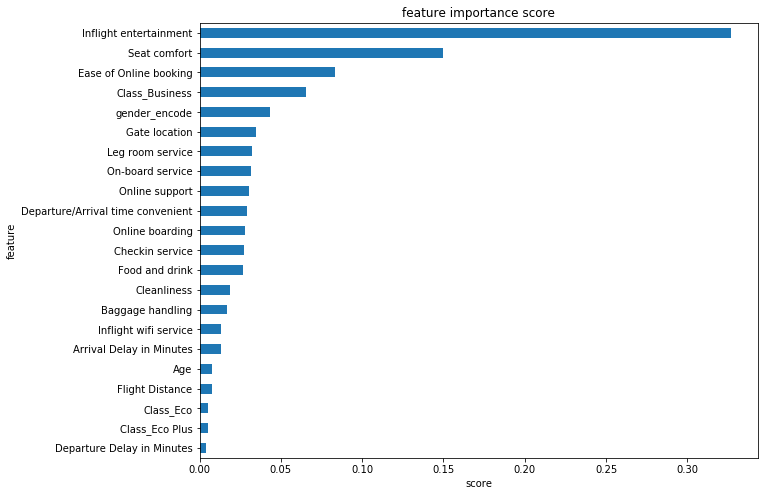

In [101]:
show_feature_importance(xg)

> Top 3 Feature yang paling berpengaruh adalah :

    - Inflight Entertainment
    - Seat Comfort
    - Ease of Online Booking

# XGBoost Hyperparameters Tuning

In [102]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42, eval_metric='mlogloss')
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42)
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred = xg_tuned.predict(X_test)#Check performa dari model
eval_classification(xg_tuned, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.96
Recall (Test Set): 0.95
F1-Score (Test Set): 0.95
AUC: 0.95


# Trained Score

In [103]:
print('Train score : ' + str(xg_tuned.score(X_train, y_train)))
print('Test score : ' + str(xg_tuned.score(X_test, y_test)))

Train score : 0.9973764321691482
Test score : 0.9501226914632571


# Confusion Matrix

In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
def make_confusion_matrix2(model, threshold=0.7):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (xg_tuned.predict_proba(X_test)[:, 1] >= threshold)
    satisfaction_encode = confusion_matrix(y_test, y_pred)
    plt.figure(dpi=120)
    ax = sns.heatmap(satisfaction_encode, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Dissatisfied', 'Satisfied'],
           yticklabels=['Dissatisfied', 'Satisfied']);   
    plt.xlabel('Prediction',weight='bold',fontsize=12)
    plt.ylabel('Actual',weight='bold',fontsize=12)
    plt.title('Confusion Matrix',weight='bold',fontsize=15)

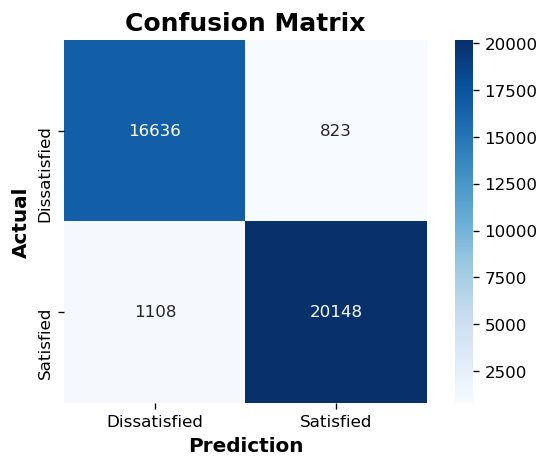

In [105]:
make_confusion_matrix2(xg_tuned)

# Selected Feature Impact Modelling

In [106]:
data_filter_ekonomi= df_cust_airlines_encode[df_cust_airlines_encode['Class_Eco']==1]
data_filter_business= df_cust_airlines_encode[df_cust_airlines_encode['Class_Business']==1]
data_filter_ecoplus= df_cust_airlines_encode[df_cust_airlines_encode['Class_Eco Plus']==1]

In [107]:
data_test_eco=data_filter_ekonomi.copy()
data_test_ecoplus=data_filter_ecoplus.copy()
data_test_business=data_filter_business.copy()

# Eco Impact Modelling

In [108]:
data_test_eco_1=data_test_eco.drop(columns=['satisfaction','satisfaction_encode','Yes_satisfied','Yes_dissatisfied',
                                            'Customer Type','Type of Travel','Class','Gender','Gender_Female','Gender_Male',
                                            'Type_Loyal Customer','Type_disloyal Customer','Yes_Business travel','Yes_Personal Travel'])

In [109]:
data_test_eco_1['Inflight entertainment'].median()

3.0

In [110]:
data_test_eco_1['Seat comfort'].median()

3.0

In [111]:
data_test_eco_1['Ease of Online booking'].median()

4.0

In [112]:
data_test_eco_1['Inflight entertainment']=data_test_eco_1['Inflight entertainment'].apply(lambda x : 4 if x < 4 else x)
data_test_eco_1['Seat comfort']=data_test_eco_1['Seat comfort'].apply(lambda x : 4 if x < 4 else x)
data_test_eco_1['Ease of Online booking']=data_test_eco_1['Ease of Online booking'].apply(lambda x : 5 if x < 5 else x)

In [113]:
y_pred_eco = xg_tuned.predict(data_test_eco_1)#Check performa dari model
y_proba_eco = xg_tuned.predict_proba(data_test_eco_1)

In [114]:
y_pred_eco=pd.DataFrame(y_pred_eco.tolist())

In [115]:
data_test_eco_2=data_test_eco_1.reset_index(drop=True)

In [116]:
data_test_eco_2['satisfaction']=y_pred_eco

In [117]:
data_test_eco_2['satisfaction'].value_counts()

1    39949
0    18320
Name: satisfaction, dtype: int64

In [118]:
data_test_eco['satisfaction'].value_counts()

dissatisfied    35302
satisfied       22967
Name: satisfaction, dtype: int64

In [119]:
((39949-22967)/22967)*100

73.94087168546176

> Dengan mengubah top 3 feature yang berpengaruh persentase Satisfied penumpang kelas Economy naik sebesar 73.9%

# Business Impact Modelling

In [120]:
data_test_bus_1=data_test_business.drop(columns=['satisfaction','satisfaction_encode','Yes_satisfied','Yes_dissatisfied',
                                                 'Customer Type','Type of Travel','Class','Gender','Gender_Female','Gender_Male',
                                                 'Type_Loyal Customer','Type_disloyal Customer','Yes_Business travel','Yes_Personal Travel'])

In [121]:
data_test_bus_1['Inflight entertainment'].median()

4.0

In [122]:
data_test_bus_1['Seat comfort'].median()

3.0

In [123]:
data_test_bus_1['Ease of Online booking'].median()

4.0

In [124]:
data_test_bus_1['Inflight entertainment']=data_test_bus_1['Inflight entertainment'].apply(lambda x : 5 if x < 5 else x)
data_test_bus_1['Seat comfort']=data_test_bus_1['Seat comfort'].apply(lambda x : 4 if x < 4 else x)
data_test_bus_1['Ease of Online booking']=data_test_bus_1['Ease of Online booking'].apply(lambda x : 5 if x < 5 else x)

In [125]:
y_pred_bus = xg_tuned.predict(data_test_bus_1)#Check performa dari model
y_proba_bus = xg_tuned.predict_proba(data_test_bus_1)

In [126]:
y_pred_bus=pd.DataFrame(y_pred_bus.tolist())

In [127]:
data_test_bus_2=data_test_bus_1.reset_index(drop=True)

In [128]:
data_test_bus_2['satisfaction']=y_pred_bus

In [129]:
data_test_bus_2['satisfaction'].value_counts()

1    51483
0     9895
Name: satisfaction, dtype: int64

In [130]:
data_test_business['satisfaction'].value_counts()

satisfied       43563
dissatisfied    17815
Name: satisfaction, dtype: int64

In [131]:
((51483-43563)/43563)*100

18.180566076716477

> Dengan mengubah top 3 feature yang berpengaruh persentase Satisfied penumpang kelas Business naik sebesar 18.1%

# Eco Plus Impact Modelling

In [132]:
data_test_ecoplus_1=data_test_ecoplus.drop(columns=['satisfaction','satisfaction_encode','Yes_satisfied','Yes_dissatisfied',
                                                    'Customer Type','Type of Travel','Class','Gender','Gender_Female','Gender_Male',
                                                    'Type_Loyal Customer','Type_disloyal Customer','Yes_Business travel','Yes_Personal Travel'])

In [133]:
data_test_ecoplus_1['Inflight entertainment'].median()

3.0

In [134]:
data_test_ecoplus_1['Seat comfort'].median()

3.0

In [135]:
data_test_ecoplus_1['Ease of Online booking'].median()

4.0

In [136]:
data_test_ecoplus_1['Inflight entertainment']=data_test_ecoplus_1['Inflight entertainment'].apply(lambda x : 4 if x < 4 else x)
data_test_ecoplus_1['Seat comfort']=data_test_ecoplus_1['Seat comfort'].apply(lambda x : 4 if x < 4 else x)
data_test_ecoplus_1['Ease of Online booking']=data_test_ecoplus_1['Ease of Online booking'].apply(lambda x : 5 if x < 5 else x)

In [137]:
y_pred_ecoplus = xg_tuned.predict(data_test_ecoplus_1)#Check performa dari model
y_proba_ecoplus = xg_tuned.predict_proba(data_test_ecoplus_1)

In [138]:
y_pred_ecoplus=pd.DataFrame(y_pred_ecoplus.tolist())

In [139]:
data_test_ecoplus_2=data_test_ecoplus_1.reset_index(drop=True)

In [140]:
data_test_ecoplus_2['satisfaction']=y_pred_ecoplus

In [141]:
data_test_ecoplus_2['satisfaction'].value_counts()

1    6294
0    3109
Name: satisfaction, dtype: int64

In [142]:
data_test_ecoplus['satisfaction'].value_counts()

dissatisfied    5387
satisfied       4016
Name: satisfaction, dtype: int64

In [143]:
((6294-4016)/4016)*100

56.72310756972112

> Dengan mengubah top 3 feature yang berpengaruh persentase Satisfied penumpang kelas Eco Plusnaik sebesar 56.7%

# Conclusion

> Dengan mengubah top 3 feature yaitu feature Inflight Entertainment, Seat Comfort, Ease of Online booking persentase Satisfied pada penumpang naik sebesar :
    - Kelas Eco naik sebesar 74.9%
    - Kelas Business naik sebesar 18.1%
    - Kelas Eco Plus naik sebesar 56.7%

In [144]:
stop = timeit.default_timer()
time = (stop-start)/60

In [145]:
print('Time :' , time, 'menit')

Time : 6.0759403333333335 menit
